# Interação predatória e equações de Lotka-Volterra

- PET - Fisica UFRN
- Petiano: Gustavo C. A. Vilas Boas
- Data: 29/07/20

O objetivo deste projeto é simular uma interação predatória simples, com uma presa e um predador, utilizando as equações de Lotka-Volterra. Será desenvolvido em Python utilizando conhecimentos de resolução de equações diferenciais [1]. O problema foi proposto no livro Mark Newman - Computational Physics [1], na seção 8.2.

### Introdução

As equações de Lotka-Volterra são equações desenvolvidas independentemente por Alfred Lotka, em 1925, e Vito Volterra, em 1926.
São compostas por um par de equações diferenciais:

 $\dfrac{dx}{dt}$ = $\alpha x$ - $\beta xy$    
 $\dfrac{dy}{dt}$ = $\gamma xy$ - $\delta y$  

Onde x é a população de presas, y a população de predadores, $\alpha$ é a taxa de crescimento da população de presas, $\beta$ é a taxa de predação, $\gamma$ é a a razão entre a reprodução de predadores por presa consumida, e $\delta$ é a taxa de mortalidade de predadores.  
Para essas equações são tomadas quatro suposições [2]:
- A população de presas cresce exponencialmente quando não tem predadores;
- A população de predadores morre de fome na falta de presas;
- Predadores podem consumir infinitas presas;
- Não há complexidade ambiental (ambas populações andam livremente num ambiente homogêneo) 

  
Essas equações foram utilizadas no aspecto biológico inicialmente, mas posteriormente foram utilizadas para vários fins, como físico ou até econômico, como o artigo [3] utiliza.

### Método utilizado

Será utilizado para a resolução do problema o método Runge-Kutta de quarta ordem (RK4), porém utilizando o $r$ como um vetor armazenando $x$ e $y$.

### Importando bibliotecas

In [1]:
from numpy import array
from pylab import plot, show, legend, grid, xlabel, ylabel

### Criando a função das equações de Lotka-Volterra

A função $f(r,t)$ recebe o tempo $t$ e o vetor $r$ que contém $x$ e $y$, e utilizando esses valores, junto com as constantes que serão declaradas com valores dados na questão, retorna os valores de $\dfrac{dx}{dt}$ e $\dfrac{dy}{dt}$.

In [2]:
def f(r,t):
    x = r[0]
    y = r[1]
    dx = alpha*x - beta*x*y
    dy = gamma*x*y - delta*y
    return array([dx,dy], float)

### Criando a função RK4

A função $RK4(r,t)$ consiste no método Runge-Kutta de quarta ordem, previamente explicado nos projetos anteriores.

In [3]:
def RK4(r,t):
    k1 = h*f(r,t)
    k2 = h*f(r+k1/2,t+h/2)
    k3 = h*f(r+k2/2,t+h/2)
    k4 = h*f(r+k3,t+h)
    return r + (1/6)*(k1+2*k2+2*k3+k4)

### Definição de parâmetros iniciais

Para iniciar a simulação, são definidos parâmetros iniciais para o tempo, tamanho das populações e constantes. Os valores das constantes _alpha, beta, gamma_ e _delta_ e as populações iniciais $x$ e $y$ foram retirados da questão 8.2 [1].

In [4]:
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2
x = 2
y = 2

Após a definição dos parâmetros iniciais, são declaradas as variáveis de tempo, sendo $a$ o tempo inicial e $b$ o tempo final.  
O parâmetro $N$ simboliza a quantidade de passos que a simulação terá, e utilizado também para encontrar o $h$, que é o intervalo de tempo para cada passo. E o $r$ é o vetor de $x$ e $y$.

In [5]:
a = 0
b = 30
r = array([x,y], float)
N = 3000
h = (b-a)/N
t = a

Para plotar o gráfico no final da simulação, é necessário o armazenamento dos dados das populações e do tempo gerados no decorrer do cálculo, e para isso, são criadas várias listas vazias, para posteriormente serem preenchidas com o _append_.

In [6]:
listat = []
listax = []
listay = []
h = (b-a)/N
t = a

### Resolvendo EDOs

Após a criação de funções, definição de parâmetros iniciais e criação de listas para armazenar os resultados, um laço é criado para resolver as EDOs.

In [7]:
while(t<b):
    listat.append(t)
    listax.append(r[0])
    listay.append(r[1])
    r = RK4(r,t)    
    t+=h

### Plotando os resultados

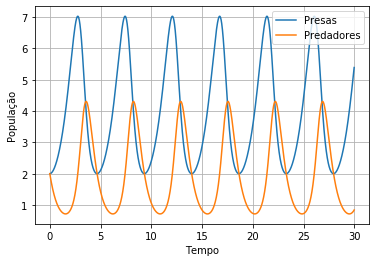

In [8]:
plot(listat,listax,label='Presas')
plot(listat,listay,label='Predadores')
xlabel("Tempo")
ylabel("População")
legend(loc='upper right')
grid()
show()

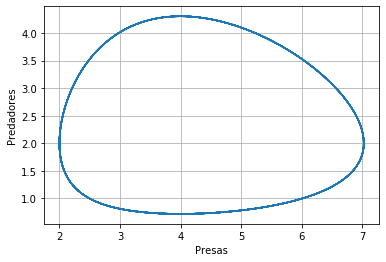

In [9]:
plot(listax,listay) #Plot do espaço de fase
xlabel("Presas")
ylabel("Predadores")
grid()
show()

### Conclusão

A população de predadores cresce com o crescimento da população de presas, mas esse aumento de predadores causa uma diminuição nas presas, e por causa disso, também diminui a quantidade de predadores, e esse ciclo continua.

### Referências

[1] Mark Newman-Computational Physics (2013,University of Michigan)    
[2] http://www.tiem.utk.edu/~gross/bioed/bealsmodules/predator-prey.html  
[3] BISCHI ,G. I.; TRAMONTANA, F. Three-dimensional discrete-time Lotka–Volterra models with an application to industrial clusters. Communications in Nonlinear Science and Numerical Simulation, v. 15, Issue 10, Outubro 2010, pg. 3000-3014.